In [1]:
# Train the Neural Machine Translation Model
import torch
from correct_implementation import train_model_enhanced, run_validation_tests

# First, run validation tests to ensure all fixes are working
print("Running validation tests...")
run_validation_tests()
print("\n" + "="*60)

# Train the model with enhanced features
print("Starting model training...")

# Training configuration (using correct parameter names)
config = {
    'data_file_path': 'eng_-french.csv',  # Make sure this file exists
    'epochs': 10,                          # Reduced for faster training
    'batch_size': 64,                     # Smaller batch size for stability
    'embedding_dim': 96,                  # Reduced embedding dimension
    'lstm_units': 256,                    # LSTM hidden units
    'encoder_num_layers': 1,              # Reduced to 1 layer for faster training
    'decoder_num_layers': 1,              # Reduced to 1 layer for faster training
    'bidirectional': True,                # Use bidirectional encoder
    'learning_rate': 0.001,               # Learning rate
    'sample_size': 50000,                  # Small dataset for faster training
    'teacher_forcing_schedule': 'constant', # Use constant teacher forcing for stability
    'dropout_rate': 0.1,                  # Dropout rate for regularization
    'device': 'cuda' if torch.cuda.is_available() else 'cpu'
}

print(f"Training configuration: {config}")
print(f"Using device: {config['device']}")

# Start training with better error handling
try:
    print("Preparing data and building model...")
    # Fix: The function returns model, data_dict, history (not model, history, data_dict)
    model, data_dict, history = train_model_enhanced(**config)
    
    # Verify training completed successfully
    if 'train_loss' in history and len(history['train_loss']) > 0:
        print(f"\n✅ Training completed successfully after {len(history['train_loss'])} epochs!")
        print(f"Final training loss: {history['train_loss'][-1]:.4f}")
        print(f"Final validation loss: {history['val_loss'][-1]:.4f}")
        
        # Save the trained model with all components
        checkpoint = {
            'model': model,
            'data_dict': data_dict,
            'history': history,
            'config': config,
            'training_completed': True
        }
        torch.save(checkpoint, 'trained_nmt_model.pt')
        print("Model saved to 'trained_nmt_model.pt'")
    else:
        print("❌ Training did not complete successfully - no valid history found")
        print("Available history keys:", list(history.keys()) if history else "No history")
        
except FileNotFoundError as e:
    print(f"❌ Data file not found: {e}")
    print("Please make sure 'eng_-french.csv' exists in the current directory")
except Exception as e:
    print(f"❌ Training failed with error: {e}")
    import traceback
    traceback.print_exc()
    print("\nTip: Try reducing batch_size, sample_size, or model complexity if you're getting memory errors")

Running validation tests...
Running validation tests for NMT implementation fixes...
1. Testing gradient clipping...
✓ Gradient clipping using PyTorch built-in is available
2. Testing bidirectional LSTM state concatenation...
✓ Bidirectional LSTM state concatenation works correctly
3. Testing single layer bidirectional LSTM...
✓ Single layer bidirectional LSTM works correctly
4. Testing state projection logic...
✓ State projection logic works correctly
5. Testing no projection case...
✓ No projection case works correctly
6. Testing teacher forcing consistency...
✓ Autoregressive decode function is available for consistent teacher forcing

✅ All validation tests passed! The NMT implementation fixes are working correctly.

Starting model training...
Training configuration: {'data_file_path': 'eng_-french.csv', 'epochs': 10, 'batch_size': 64, 'embedding_dim': 96, 'lstm_units': 256, 'encoder_num_layers': 1, 'decoder_num_layers': 1, 'bidirectional': True, 'learning_rate': 0.001, 'sample_siz

Training:   0%|          | 0/625 [00:00<?, ?it/s]

❌ Training failed with error: CUDA out of memory. Tried to allocate 3.09 GiB. GPU 0 has a total capacity of 3.68 GiB of which 3.07 GiB is free. Including non-PyTorch memory, this process has 596.00 MiB memory in use. Of the allocated memory 485.42 MiB is allocated by PyTorch, and 20.58 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

Tip: Try reducing batch_size, sample_size, or model complexity if you're getting memory errors


Traceback (most recent call last):
  File "/tmp/ipykernel_3680585/1038134837.py", line 37, in <module>
    model, data_dict, history = train_model_enhanced(**config)
                                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/rohan/ws/dltest/dl/correct_implementation.py", line 1165, in train_model_enhanced
    loss, acc = train_step(
                ^^^^^^^^^^^
  File "/home/rohan/ws/dltest/dl/correct_implementation.py", line 882, in train_step
    predictions = model(encoder_inputs, decoder_inputs)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/rohan/ws/dltest/dl/correct_implementation.py", line 650, in __call__
    decoder_outputs = self.decoder(decoder_inputs, encoder_outputs, initial_state)
                      ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/rohan/ws/dltest/dl/correct_implementation.py", line 527, in __call__
    context_vector, attention_weights = self.attention(
                                  

Loading trained model...
Using device: cuda
✅ Model loaded successfully!
Model was trained for 3 epochs

TESTING TRANSLATIONS (English → French)
 1. English:  Hello, how are you?
    French:   ou t e s t u e s a r s e

 2. English:  I love machine learning.
    French:   e a s a n t s a s d e s a i t

 3. English:  The weather is beautiful today.
    French:   e s s t a i

 4. English:  What time is it?
    French:   e s e m a s t a n t e

 5. English:  Thank you very much.
    French:   ou s a is a s t u n e s t e t

 6. English:  Good morning!
    French:   e s t e a s

 7. English:  How much does this cost?
    French:   ou s a s t é a r t a s

 8. English:  Where is the nearest restaurant?
    French:   l e s a s ou r a s s

 9. English:  I am learning French.
    French:   e t s a is t a n s

10. English:  Have a nice day!
    French:   e s t e t a i t é

TRAINING HISTORY
Final Training Loss:    2.6599
Final Validation Loss:  2.6353
Final Training Accuracy: 0.2962


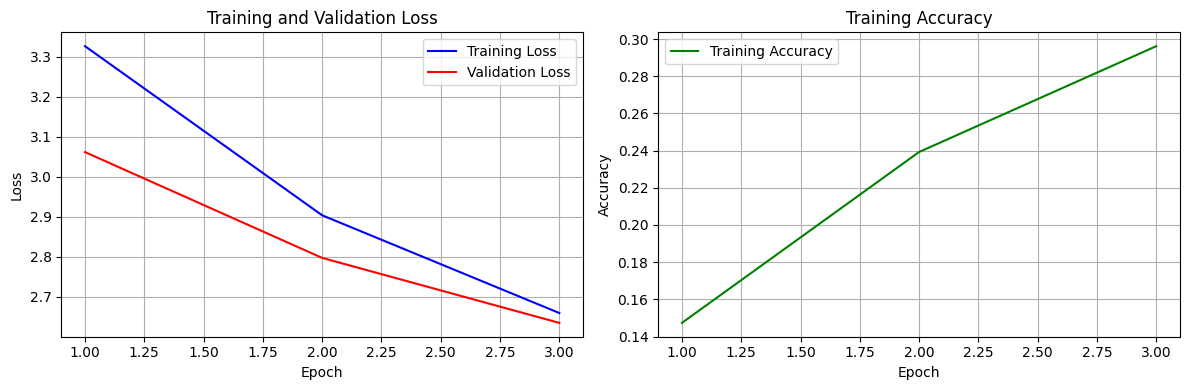


✅ Model testing completed!


In [2]:
# Test the Trained Model
import torch
from correct_implementation import translate_sentence, prepare_data, EncoderDecoderModel

print("Loading trained model...")

try:
    # Get device first to ensure consistent device usage
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f"Using device: {device}")
    
    # Load the trained model with proper device mapping
    # Set weights_only=False since we're loading custom classes we trust
    checkpoint = torch.load('trained_nmt_model.pt', map_location=device, weights_only=False)
    
    # Check if training completed successfully
    training_completed = checkpoint.get('training_completed', False)
    
    if not training_completed:
        print("❌ The saved model appears to be incomplete.")
        print("Please run the training cell (Cell 1) first and wait for it to complete successfully.")
        print("Available checkpoint keys:", list(checkpoint.keys()))
        raise ValueError("Training not completed")
    
    model = checkpoint['model']
    data_dict = checkpoint['data_dict']
    history = checkpoint['history']
    config = checkpoint['config']
    
    # Move model to the correct device
    model = model.to(device)
    
    print("✅ Model loaded successfully!")
    
    # Verify we have the essential components for translation
    required_keys = ['bpe_tokenizer', 'sos_id', 'eos_id', 'max_eng_length']
    missing_keys = [key for key in required_keys if key not in data_dict]
    
    if missing_keys:
        print(f"❌ Missing required data_dict keys: {missing_keys}")
        print("Available data_dict keys:", list(data_dict.keys()))
        raise ValueError("Incomplete data dictionary")
    
    # Check if training completed successfully
    if 'train_loss' in history and len(history['train_loss']) > 0:
        print(f"Model was trained for {len(history['train_loss'])} epochs")
    else:
        print("⚠️ Warning: Training history incomplete - model may not be fully trained")
    
    # Set model to evaluation mode (custom model uses train attribute)
    model.train = False
    
    # Test sentences (English to French)
    test_sentences = [
        "Hello, how are you?",
        "I love machine learning.",
        "The weather is beautiful today.",
        "What time is it?",
        "Thank you very much.",
        "Good morning!",
        "How much does this cost?",
        "Where is the nearest restaurant?",
        "I am learning French.",
        "Have a nice day!"
    ]
    
    print("\n" + "="*60)
    print("TESTING TRANSLATIONS (English → French)")
    print("="*60)
    
    # Translate each test sentence using the correct function signature
    for i, sentence in enumerate(test_sentences, 1):
        try:
            translation = translate_sentence(
                model=model,
                sentence=sentence, 
                bpe_tokenizer=data_dict['bpe_tokenizer'],
                max_eng_length=data_dict['max_eng_length'],
                device=device,
                max_output_length=30,
                temperature=0.7
            )
            
            print(f"{i:2d}. English:  {sentence}")
            print(f"    French:   {translation}")
            print()
            
        except Exception as e:
            print(f"{i:2d}. English:  {sentence}")
            print(f"    Error:    {str(e)}")
            print()
    
    # Display training history if available
    if 'train_loss' in history and 'val_loss' in history and len(history['train_loss']) > 0:
        print("="*60)
        print("TRAINING HISTORY")
        print("="*60)
        
        final_train_loss = history['train_loss'][-1]
        final_val_loss = history['val_loss'][-1]
        final_train_acc = history['train_acc'][-1] if 'train_acc' in history else 0.0
        
        print(f"Final Training Loss:    {final_train_loss:.4f}")
        print(f"Final Validation Loss:  {final_val_loss:.4f}")
        print(f"Final Training Accuracy: {final_train_acc:.4f}")
        
        # Plot training curves if matplotlib is available
        try:
            import matplotlib.pyplot as plt
            
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
            
            # Loss curves
            epochs = range(1, len(history['train_loss']) + 1)
            ax1.plot(epochs, history['train_loss'], 'b-', label='Training Loss')
            ax1.plot(epochs, history['val_loss'], 'r-', label='Validation Loss')
            ax1.set_xlabel('Epoch')
            ax1.set_ylabel('Loss')
            ax1.set_title('Training and Validation Loss')
            ax1.legend()
            ax1.grid(True)
            
            # Accuracy curve
            if 'train_acc' in history:
                ax2.plot(epochs, history['train_acc'], 'g-', label='Training Accuracy')
                ax2.set_xlabel('Epoch')
                ax2.set_ylabel('Accuracy')
                ax2.set_title('Training Accuracy')
                ax2.legend()
                ax2.grid(True)
            else:
                ax2.text(0.5, 0.5, 'Accuracy data not available', 
                        ha='center', va='center', transform=ax2.transAxes)
                ax2.set_title('Training Accuracy (Not Available)')
            
            plt.tight_layout()
            plt.show()
            
        except ImportError:
            print("Matplotlib not available - skipping plots")
    else:
        print("="*60)
        print("TRAINING HISTORY")
        print("="*60)
        print("⚠️ Training history not available - model may not be fully trained")
        print("Available history keys:", list(history.keys()) if history else "None")
    
    print("\n✅ Model testing completed!")
    
except FileNotFoundError:
    print("❌ No trained model found. Please run the training cell first.")
    print("Make sure the first cell completed successfully before running this cell.")
except Exception as e:
    print(f"❌ Testing failed with error: {e}")
    import traceback
    traceback.print_exc()
    print("\n💡 Troubleshooting tips:")
    print("1. Make sure the training cell (Cell 1) runs completely without errors")
    print("2. Wait for the message '✅ Training completed successfully!'")
    print("3. Check that 'eng_-french.csv' exists in your directory")